In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/home/beans/bespoke')

from constants import *
from imports import *
from traj_utils import *

In [2]:
get_target_wp_dist(0)

2.7

In [3]:
mph_to_mps(10)

4.4704

In [18]:
%%time
get_obs_per_sec()

CPU times: user 2.35 ms, sys: 0 ns, total: 2.35 ms
Wall time: 2.09 ms


(53.5, 4.48)

In [6]:
%%time
get_mins_since_slowest_runner_reported()

ValueError: max() arg is an empty sequence

In [19]:
for i in range(10_000):
    print(round(get_mins_since_slowest_runner_reported(), 2), get_obs_per_sec())
    time.sleep(60*1)

4.14 (49.06, 4.8)


KeyboardInterrupt: 

In [4]:
# Shut down trainer
set_trainer_should_stop(True)

In [44]:
t = torch.randn((3,4))
t[0][0] = torch.nan

In [45]:
torch.clamp(t, -10, 10)

tensor([[    nan,  0.2464,  0.2079, -0.3504],
        [ 0.7383, -0.5889, -0.2498,  0.6668],
        [-0.1999, -0.0737, -0.8708, -0.5061]])

In [28]:
# Shut down loader
#set_loader_should_stop(True)

In [5]:
# Shut down datagen
set_should_stop(True)

In [23]:
moving_average(np.array([0,1.1,2,3.5,4.9,5,6,7,8,9,10,11,12,13]),w=5)

array([ 0.  ,  1.1 ,  2.3 ,  3.3 ,  4.28,  5.28,  6.18,  7.  ,  8.  ,
        9.  , 10.  , 11.  , 12.  , 13.  ])

In [12]:
import math
original_angle = .03
road_roll = .03
new_angle = original_angle - math.atan(road_roll)
new_angle

8.995143122098731e-06

In [13]:
math.atan(.1)

0.09966865249116204

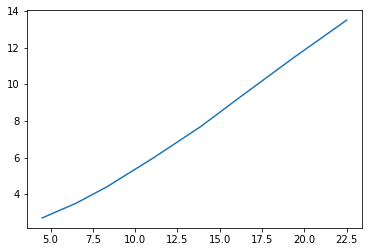

In [5]:
min_dist_lookup = [
    (4.5, 2.7), # 10 mph
    (6.5, 3.5), # 14.5 mph
    (8.33, 4.4), #18 mph (speed mps, wp dist m)
    (11.11, 6.), # 24 mph
    (13.89, 7.7), # 30 mph
    (16.2, 9.3), # 36 mph
    (19.44, 11.5), # 43 mph
    (22.5, 13.5), # 50 mph
]

min_dist_bps = [x[0] for x in min_dist_lookup]
min_dist_vals = [x[1] for x in min_dist_lookup]

plt.plot(min_dist_bps, min_dist_vals)


In [7]:
np.tan(.5)

0.5463024898437905

In [54]:
tire_angle = .4
WHEELBASE = 1.8 #2.66
speed = mph_to_mps(10)

curvature = tire_angle/WHEELBASE # rad/m 
vehicle_turn_rate_sec = curvature * speed # rad/sec
future_vehicle_heading = vehicle_turn_rate_sec * .05
future_vehicle_heading

0.04967111111111111

In [55]:
dist_car_travelled_during_lag = speed / 20.
dist_car_travelled_during_lag

0.22352

In [56]:
r = dist_car_travelled_during_lag / future_vehicle_heading # radius of the circle around which ego is turning m/rad
r

4.5

In [57]:
# correct way
future_vehicle_y = np.sin(future_vehicle_heading)*r
future_vehicle_x = r - (np.cos(future_vehicle_heading)*r)
future_vehicle_x, future_vehicle_y

(0.005550102127081402, 0.22342809919549694)

In [58]:
a = future_vehicle_heading/2
x = dist_car_travelled_during_lag*np.cos(a)
y = (dist_car_travelled_during_lag*np.sin(a))
x, y

(0.2234510694365123, 0.005550672723098684)

In [11]:
4/6.5

0.6153846153846154

In [19]:
ACCELERATION_DUE_TO_GRAVITY = 9.8
roll = .03
sf = 1/401
u = 20

m = 1700
l = 2.66
aF = l * .41
aR = l - aF
tire_stiffness_factor = .677
cF, cR = tire_stiffness_factor, tire_stiffness_factor
sf = m * (cF*aF - cR*aR) / (l**2 * cF * cR)

In [22]:
(cF*aF - cR*aR)

-0.3241476

In [20]:
sf

-169.92259081973765

In [21]:
roll_compensation = (ACCELERATION_DUE_TO_GRAVITY * roll) / ((1 / sf) - u**2)
#roll_compensation = (ACCELERATION_DUE_TO_GRAVITY * roll) / u**2
roll_compensation

-0.0007349891864115468

In [197]:
roll_compensation_angles = CRV_WHEELBASE * roll_compensation
roll_compensation_angles

0.0019551

In [198]:
from traj_utils import *
tire_angles_to_max_speeds(.02), tire_angles_to_max_speeds(.02-roll_compensation_angles)

(14.18929668510425, 14.934187811096537)

In [3]:
# set lr
set_lr(1e-4)

In [37]:
dataloader_root = f"{BLENDER_MEMBANK_ROOT}/dataloader_06"
current_run = np.load(f"{dataloader_root}/run_counter.npy")[0]
current_run

40